In [1]:
import nbsetup
import numpy as np
import ergodicpy as ep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
def analyse(o_range, trials=10, b_max=10, func=lambda o,x: np.random.random(o), threshold=ep.THRESHOLD, ensembles=None, scan=True):
    data = []
    fixed = []
    ecs = {}
    for o in o_range:
        nbsetup.cp(o)
        ecs[o] = []
        for t in range(trials):
            x = np.random.random(o)
            y = func(o, x)
            ec = ep.ErgodicCorrelation(x, y, lazy=True, ensembles=ensembles, threshold=threshold)
            ecs[o].append(ec)
            if scan:
                # then range
                for b in ep.binint(3, int(o/b_max)):
                    ec.update_bins(b)
                    ms = ec.correlations.copy()
                    ms['o'] = o
                    ms['t'] = t
                    ms['b'] = b
                    ms['e'] = ec.ensemble_count
                    data.append(ms)
            else:
                ec.stabilize()
                ms = ec.correlations.copy()
                ms['o'] = o
                ms['t'] = t
                ms['b'] = len(ec.bins)-1
                ms['e'] = ec.ensemble_count
                data.append(ms)
            # maxx is the final
            fixed.append(ms)
    
    df = pd.DataFrame(data=data)
    
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
    pal = 'Spectral'
    key = 'complexity'

    # scatter
    g = sns.scatterplot(data=df, x='o', y=key, hue='b', ax=axes[0],  palette=pal)
    g.set(ylabel='Ergodic complexity', xlabel='Observations count', ylim=(0,None), title='Raw values')
        
    # strategies
    sns.lineplot(data=pd.DataFrame(data=fixed), x='o', y=key, ax=axes[1], label='max(bins)')
    g = sns.lineplot(data=df.groupby(['o','t']).min().reset_index(), x='o', y=key, ax=axes[1], label='min(complexity)')
    g = sns.lineplot(data=df.groupby(['o','t']).max().reset_index(), x='o', y=key, ax=axes[1], label='max(complexity)')
    g = sns.lineplot(data=df.groupby(['o','t']).mean().reset_index(), x='o', y=key, ax=axes[1], label='mean(complexity)')
    
    ndf = df.groupby(['o','t']).min().reset_index()
    ndf['adj'] = ndf['complexity']*(np.log(ndf['o']/ndf['b']))
    g = sns.lineplot(data=ndf, x='o', y='adj', ax=axes[1], label='min(complexity)*log(o/b)')
    
    # axis stuff
    g.set(ylim=(0,None), title='Strategies', ylabel=None, xlabel='Observations count')
    axes[1].axhline(y=threshold, color='grey', linestyle='dotted')
    
    return df, ecs, fig

# Testing low vs high for small numbers

200


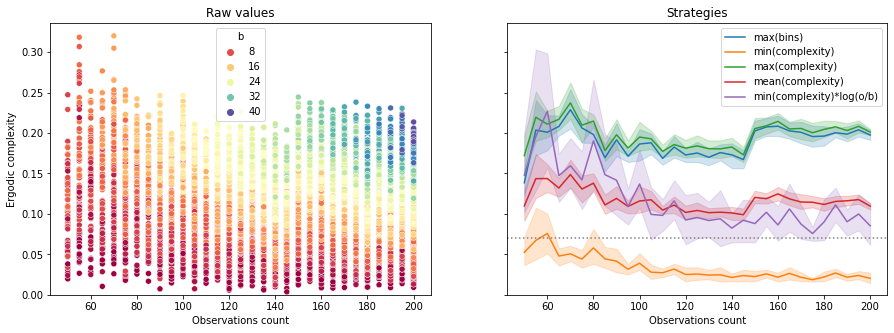

In [50]:
b = analyse(ep.binint(50,200,30))

200


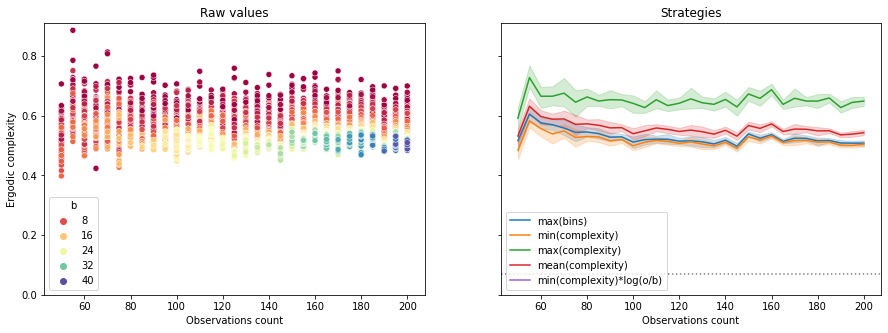

In [51]:
b = analyse(ep.binint(50,200,30), func=lambda o,x: x+np.random.normal(0,0.1,o))

# Testing for larger numbers of observations

2000


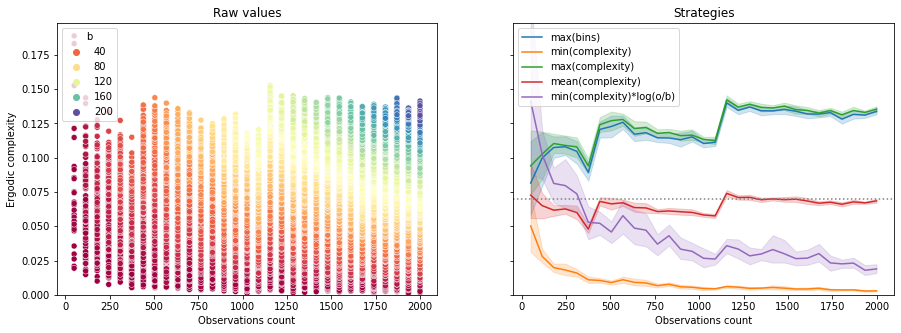

In [53]:
b = analyse(ep.binint(50,2000,30))

2000


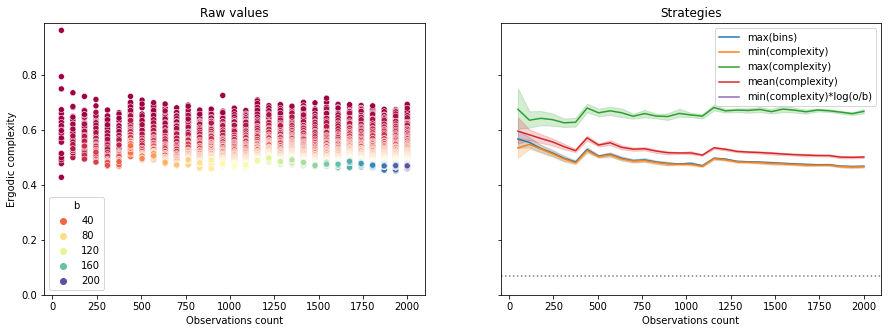

In [54]:
b = analyse(ep.binint(50,2000,30), func=lambda o,x: x+np.random.normal(0,0.1,o))

# Testing for more noise

200


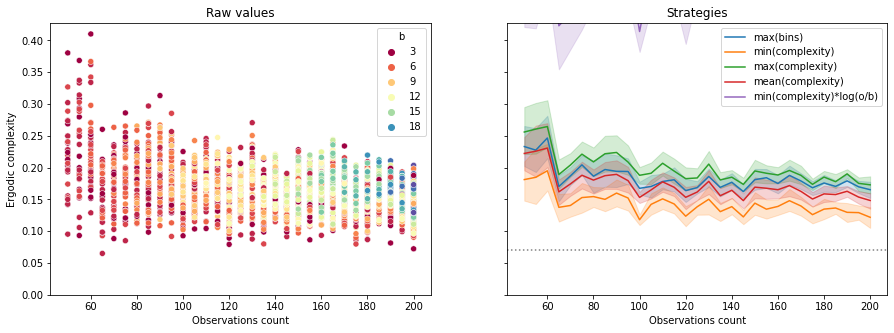

In [55]:
b = analyse(ep.binint(50,200,30), func=lambda o,x: x+np.random.normal(0,0.5,o))

200


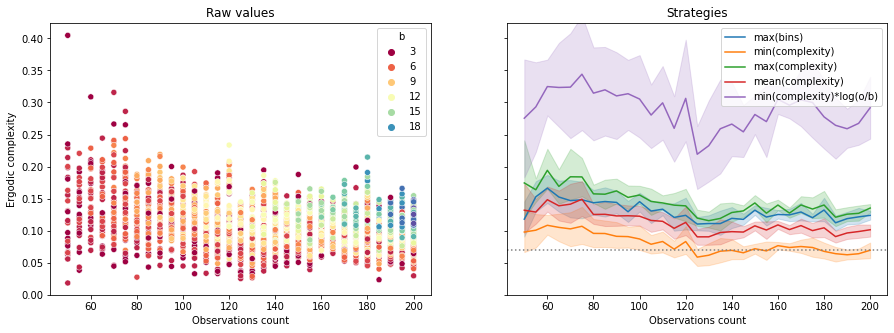

In [56]:
b = analyse(ep.binint(50,200,30), func=lambda o,x: x+np.random.normal(0,1.2,o))

<AxesSubplot:ylabel='complexity'>

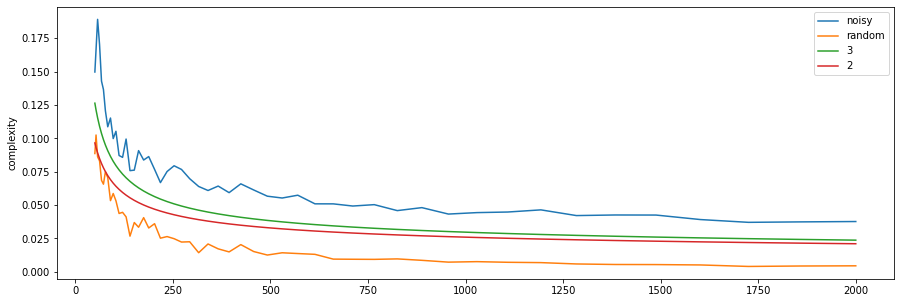

In [120]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
sns.lineplot(x=obs, y=get_stabilize(a[0])['complexity'], label='noisy', ax=axes)
sns.lineplot(x=obs, y=get_stabilize(b[0])['complexity'], label='random', ax=axes)

sns.lineplot(x=obs, y=(1/np.log(obs/3)**2), label='3', ax=axes)
sns.lineplot(x=obs, y=(1/np.log(obs/2)**2), alabel='2', ax=axes)

5000


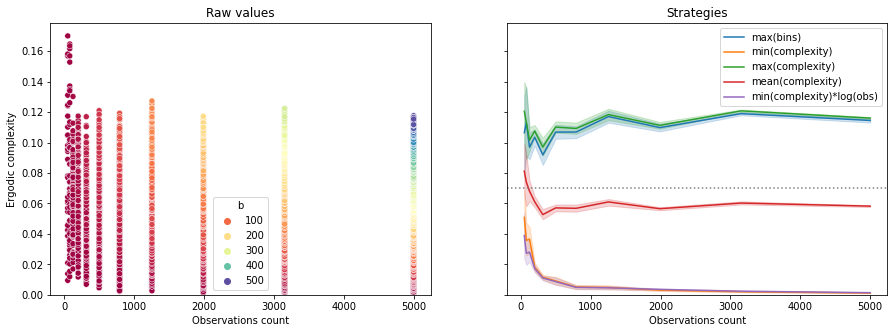

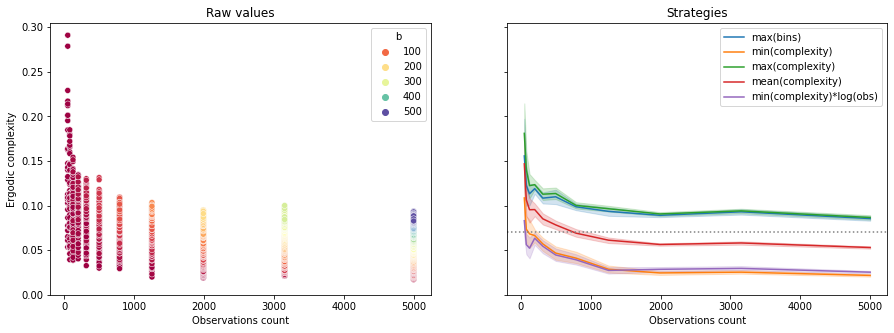

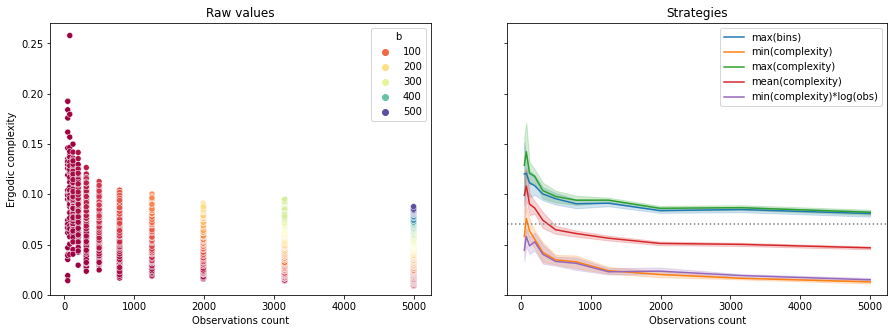

In [159]:
obs = ep.binint(50, 5000, 10, log=True)
a3 = analyse(obs, b_max=10)
b3 = analyse(obs, b_max=10, func=lambda o,x: x+np.random.normal(0,1.5,o))
c3 = analyse(obs, b_max=10, func=lambda o,x: np.ones(o)+np.random.normal(0,0.1,o))

5000


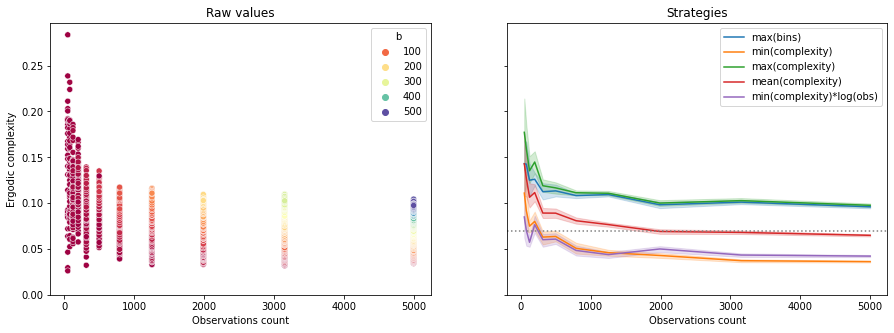

In [164]:
b2 = analyse(obs, b_max=10, func=lambda o,x: x+np.random.normal(0,0.9,o))

<AxesSubplot:ylabel='complexity'>

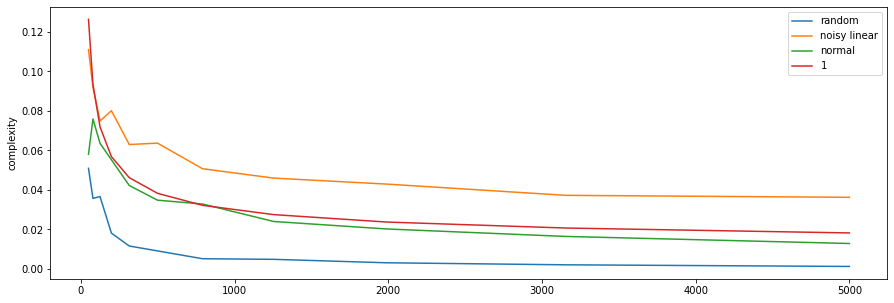

In [179]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
sns.lineplot(x=obs, y=get_stabilize(a3[0])['complexity'], label='random', ax=axes)
sns.lineplot(x=obs, y=get_stabilize(b2[0])['complexity'], label='noisy linear', ax=axes)
sns.lineplot(x=obs, y=get_stabilize(c3[0])['complexity'], label='normal', ax=axes)

adj = (1/np.log(obs)**2)-0.015
sns.lineplot(x=obs, y=(1/np.log((obs)/3)**2), label='1', ax=axes)
#sns.lineplot(x=obs, y=adj, label='adj', ax=axes)

#sns.lineplot(x=obs, y=get_stabilize(b3[0])['complexity']-adj, label='random adj', ax=axes)
#sns.lineplot(x=obs, y=get_stabilize(a3[0])['complexity']-adj, label='noisy adj', ax=axes)

2000


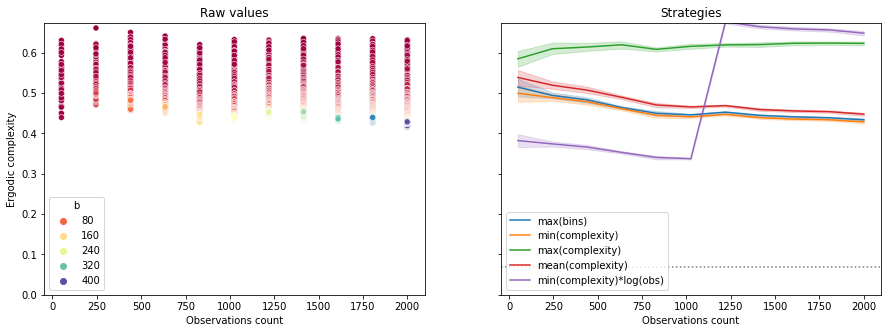

In [45]:
b = analyse(ep.binint(50,2000,10), b_max=10, func=lambda o,x: x+np.random.normal(0,0.1,o))

5000


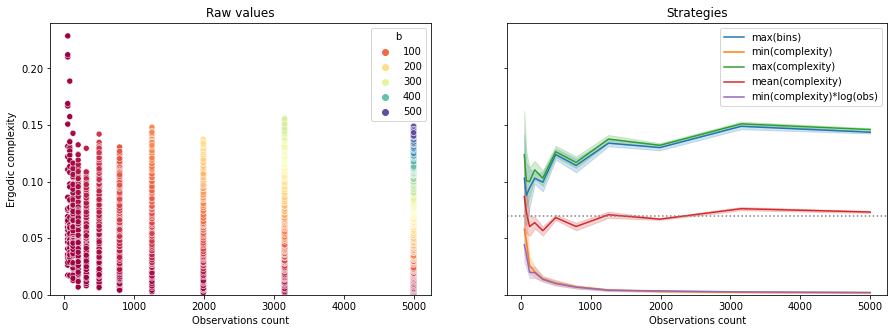

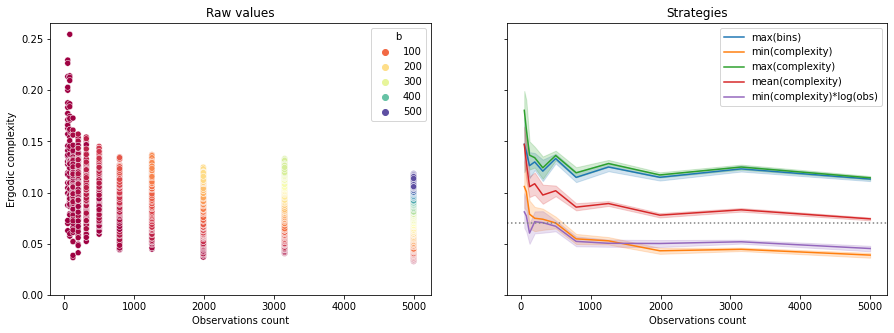

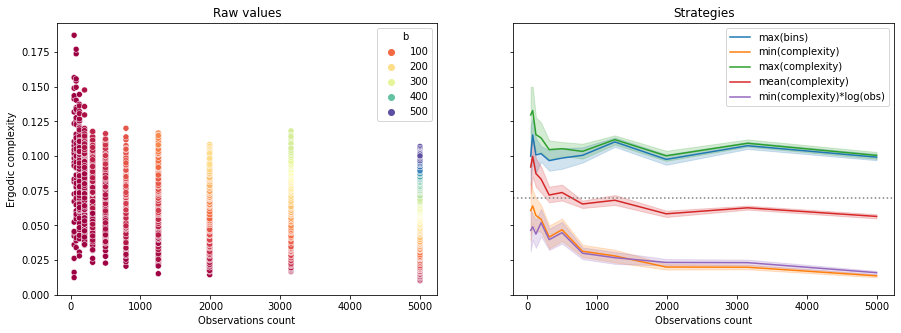

In [3]:
obs = ep.binint(50, 5000, 10, log=True)
a3 = analyse(obs, b_max=10)
b3 = analyse(obs, b_max=10, func=lambda o,x: x+np.random.normal(0,0.9,o))
c3 = analyse(obs, b_max=10, func=lambda o,x: np.ones(o)+np.random.normal(0,0.1,o))

,o,t,pearson,spearman,kendall,complexity,is_complex,b,e
0,50,0,0.240654,0.235246,0.142857,0.069214,0,3,3
1,50,1,0.119334,0.173782,0.113469,0.032438,0,3,3
2,50,2,0.199927,0.245330,0.177143,0.060309,0,3,3
3,50,3,-0.135662,-0.145450,-0.111837,0.057263,0,3,3
4,50,4,0.304532,0.302089,0.182041,0.166777,1,3,3
...,...,...,...,...,...,...,...,...,...
105,5000,5,-0.027712,-0.027414,-0.018316,0.003038,0,3,21
106,5000,6,-0.028199,-0.027842,-0.018611,0.002435,0,3,21
107,5000,7,-0.015895,-0.015935,-0.010577,0.001546,0,3,21
108,5000,8,0.009048,0.009126,0.006130,0.000730,0,3,21


In [31]:
adj_stabilize(a3[0])

,o,t,pearson,spearman,kendall,complexity,is_complex,b,e,adj
0,50,0,0.240654,0.235246,0.142857,0.069214,0,3,3,-3.699951
1,50,1,0.119334,0.173782,0.113469,0.032438,0,3,3,-4.494611
2,50,2,0.199927,0.245330,0.177143,0.060309,0,3,3,-3.846583
3,50,3,-0.135662,-0.145450,-0.111837,0.057263,0,3,3,-3.901453
4,50,4,0.304532,0.302089,0.182041,0.166777,1,3,3,-2.722933
...,...,...,...,...,...,...,...,...,...,...
105,5000,5,-0.027712,-0.027414,-0.018316,0.003038,0,3,21,-6.892204
106,5000,6,-0.028199,-0.027842,-0.018611,0.002435,0,3,21,-7.113972
107,5000,7,-0.015895,-0.015935,-0.010577,0.001546,0,3,21,-7.569256
108,5000,8,0.009048,0.009126,0.006130,0.000730,0,3,21,-8.320954


5000


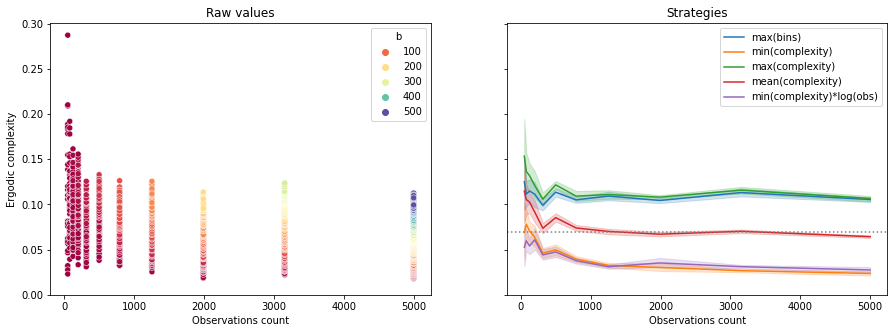

In [40]:
b2 = analyse(obs, b_max=10, func=lambda o,x: x+np.random.normal(0,1.5,o))

<AxesSubplot:xlabel='o', ylabel='adj'>

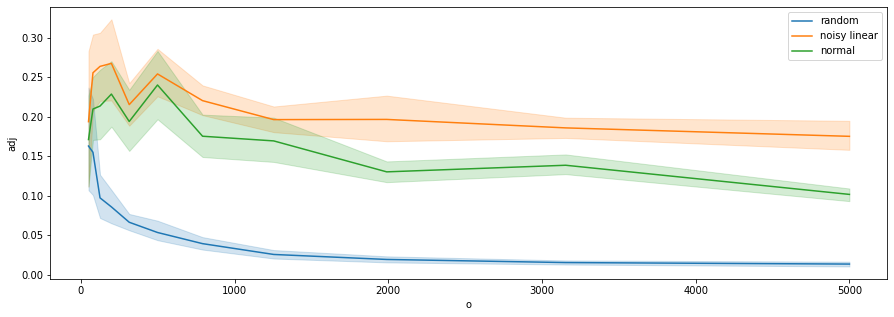

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))

def get_stabilize(df):
    return df.groupby(['o','t']).min().reset_index().groupby('o').mean()

#sns.lineplot(x=obs[:f], y=get_stabilize(a3[0])['complexity'], label='random', ax=axes)
#sns.lineplot(x=obs[:f], y=get_stabilize(b3[0])['complexity'], label='noisy linear', ax=axes)
#sns.lineplot(x=obs[:f], y=get_stabilize(c3[0])['complexity'][:f], label='normal', ax=axes)

def adj_stabilize(df):
    mdf = df.groupby(['o','t']).min().reset_index()
    mdf['adj'] = mdf['complexity']*(np.log(mdf['o']/mdf['b']))
    return mdf

xf = adj_stabilize(a3[0])
sns.lineplot(x=xf['o'], y=xf['adj'], label='random', ax=axes)
sns.lineplot(x=xf['o'], y=adj_stabilize(b2[0])['adj'], label='noisy linear', ax=axes)
sns.lineplot(x=xf['o'], y=adj_stabilize(c3[0])['adj'], label='normal', ax=axes)

#adj = (1/np.log(obs[:f])**2)-0.015
#sns.lineplot(x=obs[:f], y=(1/np.log((obs[:f]/2))**2), label='1', ax=axes)
#sns.lineplot(x=obs, y=adj, label='adj', ax=axes)

#sns.lineplot(x=obs, y=get_stabilize(b3[0])['complexity']-adj, label='random adj', ax=axes)
#sns.lineplot(x=obs, y=get_stabilize(a3[0])['complexity']-adj, label='noisy adj', ax=axes)

2000


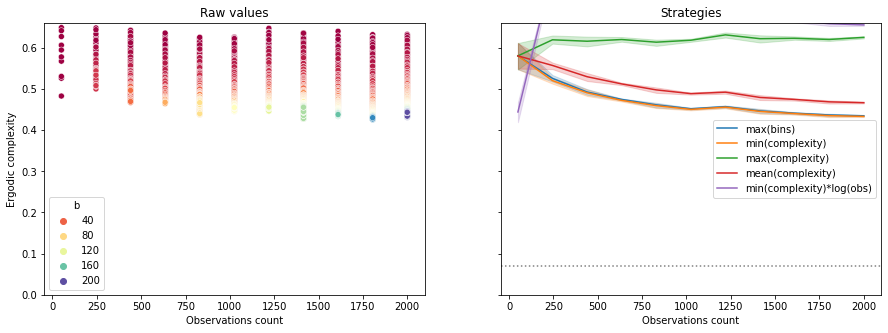

In [47]:
b = analyse(ep.binint(50,2000,10), b_max=10, func=lambda o,x: x+np.random.normal(0,0.1,o))

2000


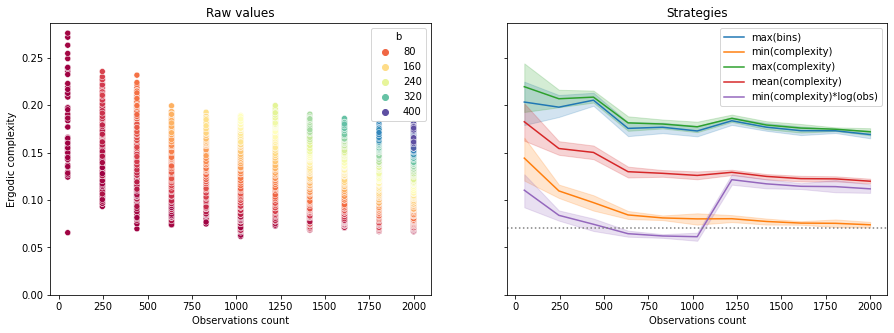

In [43]:
b = analyse(ep.binint(50,2000,10), b_max=10, func=lambda o,x: x+np.random.normal(0,0.6,o))

2000


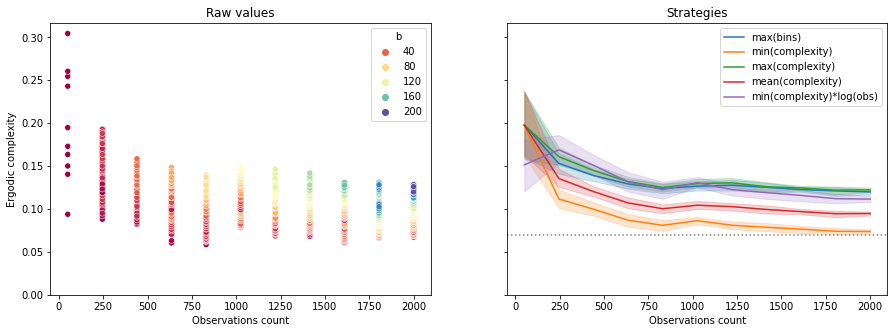

In [48]:
b = analyse(ep.binint(50,2000,10), b_max=10, func=lambda o,x: x+np.random.normal(0,0.6,o))

2000


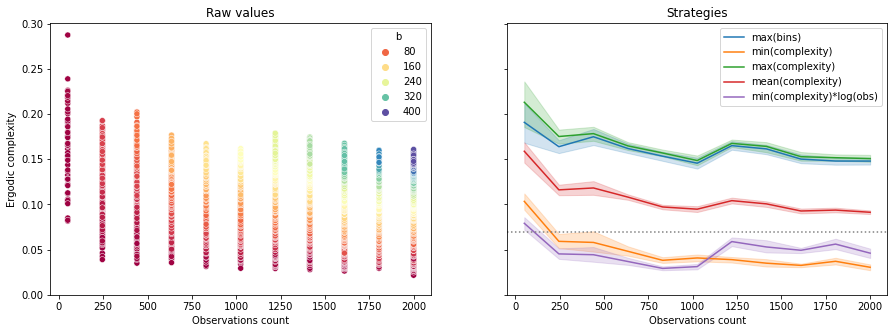

In [44]:
b = analyse(ep.binint(50,2000,10), b_max=10, func=lambda o,x: x+np.random.normal(0,1.2,o))

2000


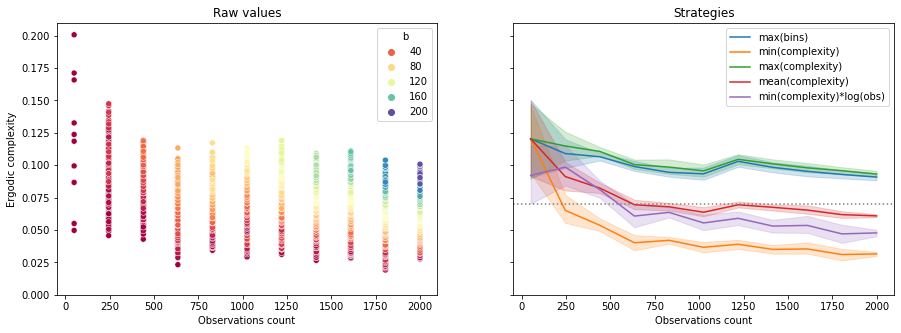

In [49]:
b = analyse(ep.binint(50,2000,10), b_max=10, func=lambda o,x: x+np.random.normal(0,1.2,o))

2000


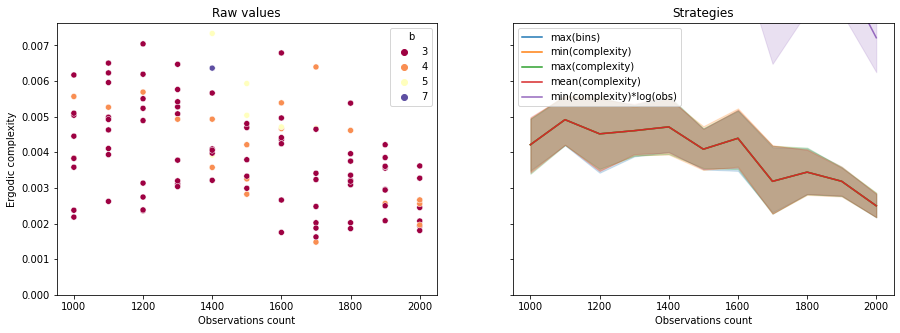

In [39]:
b = analyse(ep.binint(1000,2000,10), scan=False)

2000


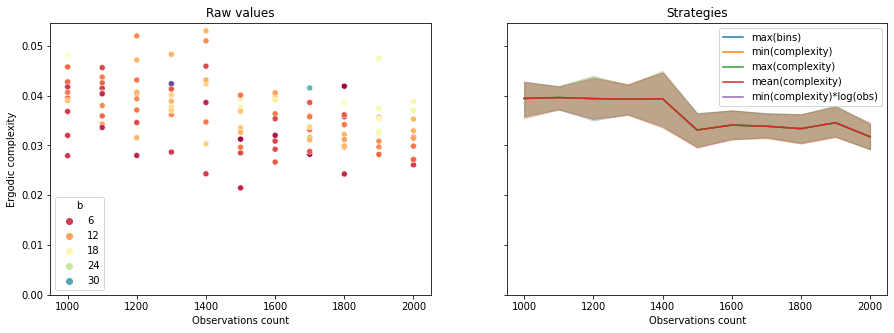

In [41]:
b = analyse(ep.binint(1000,2000,10), scan=False, func=lambda o,x: x+np.random.normal(0,1.2,o))